In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [174]:
df=pd.read_csv("Flipkart Mobile.csv")

In [3]:
df.head()

,brand,model,base_color,ROM,RAM,processor,display_size,screen_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
0,Apple,iPhone SE,Black,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
1,Apple,iPhone 12 Mini,Red,64,4,Ceramic,5.4,Small,2,1,2815,4.5,3898,57149,0.04
2,Apple,iPhone SE,Red,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
3,Apple,iPhone XR,Others,64,3,iOS,6.1,Medium,1,1,2942,4.6,96594,42999,0.10
4,Apple,iPhone 12,Red,128,4,Ceramic,6.1,Medium,2,1,2815,4.6,12669,69149,0.02


In [4]:
#Checking Null Values

In [5]:
df.isnull().sum()

brand               0
model               0
base_color          0
ROM                 0
RAM                 0
processor           0
display_size        0
screen_size         0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
dtype: int64

In [6]:
#Which Brand Selled The Most

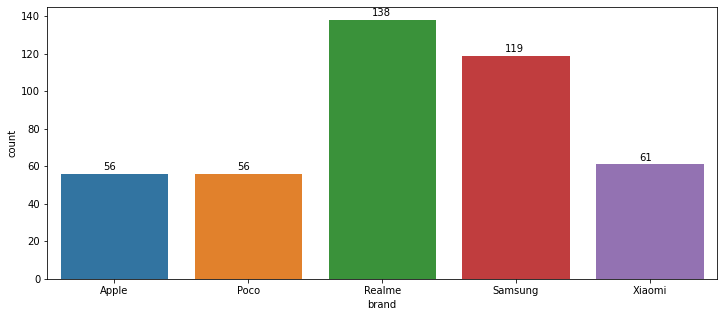

In [7]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['brand'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.32, p.get_height()+1), va = 'bottom', color = 'black')

In [8]:
#Which Color Selled The Most

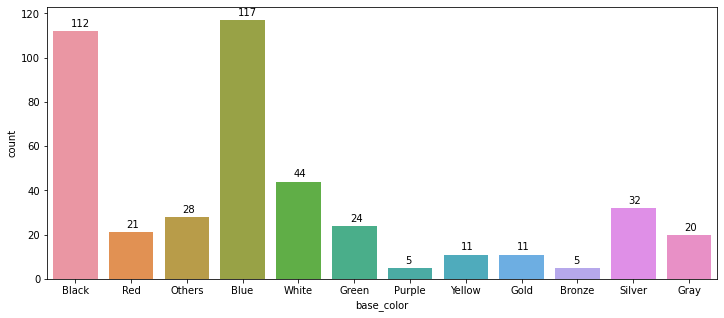

In [28]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['base_color'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.32, p.get_height()+1), va = 'bottom', color = 'black')

In [10]:
#Distribution of Sales Price

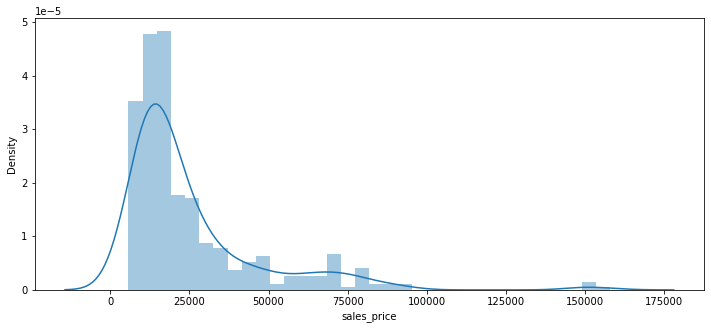

In [68]:
plt.figure(figsize=(12,5))
sns.distplot(df['sales_price'])
plt.show()

In [71]:
#Which Screen Size People Usually Prefer The Most

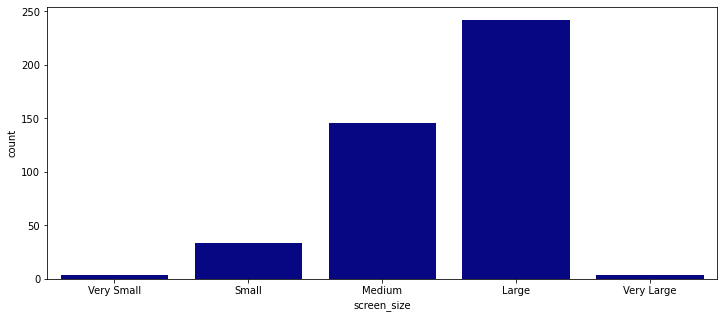

In [70]:
plt.figure(figsize=(12,5))
sns.countplot(df['screen_size'],color='darkblue',saturation=0.90)
plt.show()

In [ ]:
#Which Screen Size People Usually Prefer The Most And From Which Brand

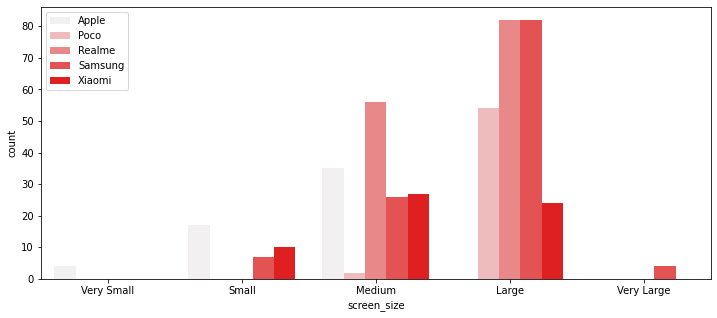

In [73]:
plt.figure(figsize=(12,5))
sns.countplot(df['screen_size'],color='red',hue=df['brand'])
plt.legend(loc='upper left')


In [75]:
#People Mostly Prefer 3 or 4 Rear Camera Phones

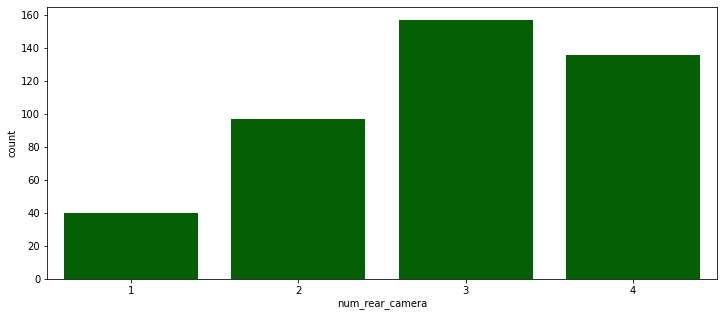

In [78]:
plt.figure(figsize=(12,5))
sns.countplot(df['num_rear_camera'],color='darkgreen',saturation=0.90)
plt.show()

In [85]:
#People Mostly Prefer 3 or 4 Rear Camera Phones And From Which Brand

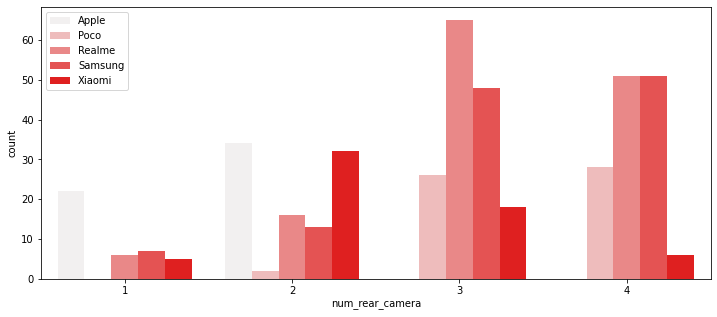

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(df['num_rear_camera'],color='red',hue=df['brand'])
plt.legend(loc='upper left')


In [98]:
#Which Rating Mobile Has Highest Discount

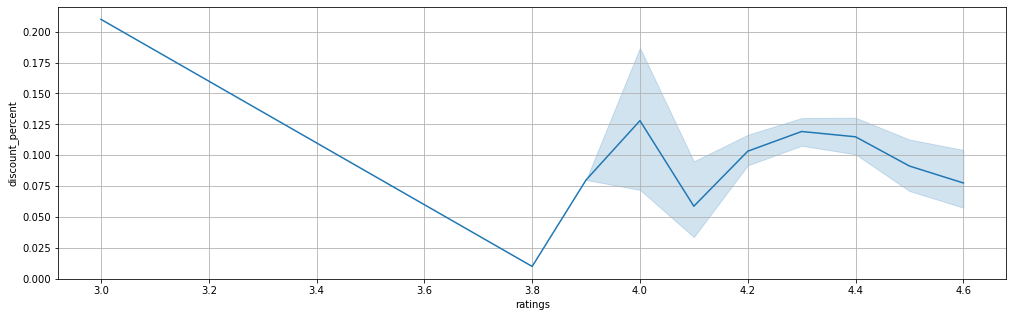

In [99]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['ratings'],y=df['discount_percent'])
plt.grid()

In [103]:
#Which Rating Mobile Has Highest Discount And From Which Brand

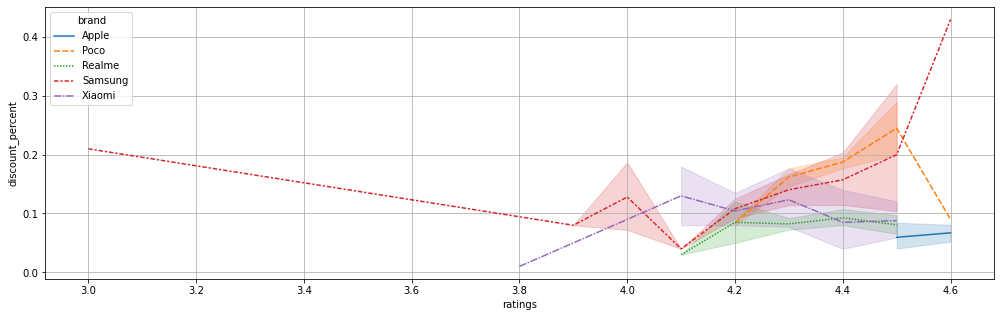

In [102]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['ratings'],y=df['discount_percent'],hue=df['brand'],style=df['brand'],markers=False)
plt.grid()

In [119]:
#Which Brand Has Highest Discount

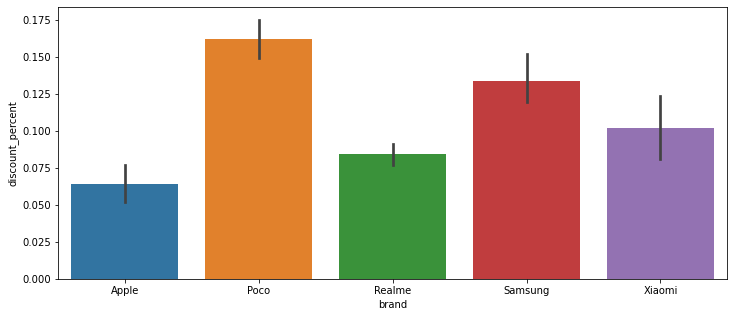

In [118]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['brand'],y=df['discount_percent'])
plt.show()


In [120]:
#Checking For Outliers

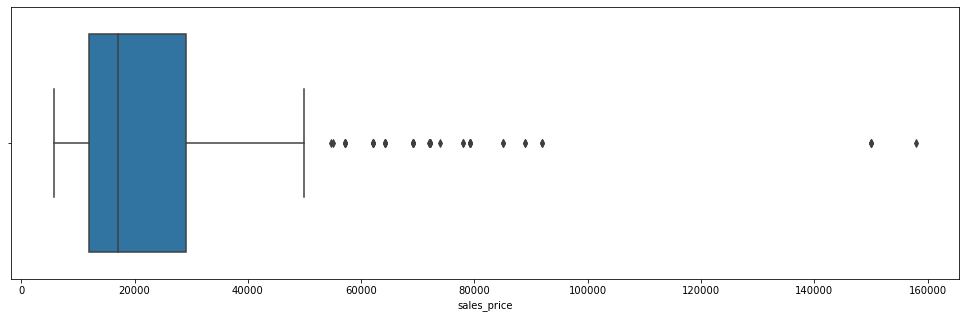

In [126]:
plt.figure(figsize=(17,5))
sns.boxplot(df['sales_price'])
plt.show()

In [127]:
#We Have Some Outliers,Now We Have To Remove Them

In [130]:
IQR=(df['sales_price'].quantile(0.75))-(df['sales_price'].quantile(0.25))
IQR

17000.0

In [133]:
lb=abs(df['sales_price'].quantile(0.25))-(1.5*IQR)
ub=abs(df['sales_price'].quantile(0.75))+(1.5*IQR)
lb,ub


(-13501.0, 54499.0)

In [136]:
df1=df[(df['sales_price']<=ub) & (df['sales_price']>=lb)]

In [150]:
newdf=pd.concat([df,df1]).drop_duplicates(keep=False)


In [157]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 408
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             49 non-null     object 
 1   model             49 non-null     object 
 2   base_color        49 non-null     object 
 3   ROM               49 non-null     int64  
 4   RAM               49 non-null     int64  
 5   processor         49 non-null     object 
 6   display_size      49 non-null     float64
 7   screen_size       49 non-null     object 
 8   num_rear_camera   49 non-null     int64  
 9   num_front_camera  49 non-null     int64  
 10  battery_capacity  49 non-null     int64  
 11  ratings           49 non-null     float64
 12  num_of_ratings    49 non-null     int64  
 13  sales_price       49 non-null     int64  
 14  discount_percent  49 non-null     float64
dtypes: float64(3), int64(7), object(5)
memory usage: 6.1+ KB


In [173]:
#Total 49 Outliers Found

In [158]:
#Distribution Before Removing Outliers

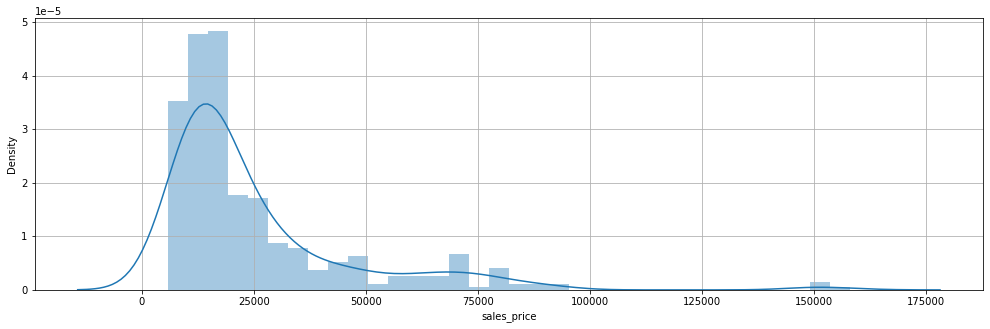

In [171]:
plt.figure(figsize=(17,5))
sns.distplot(df['sales_price'])
plt.grid()

In [172]:
#Distribution After Removing Outliers

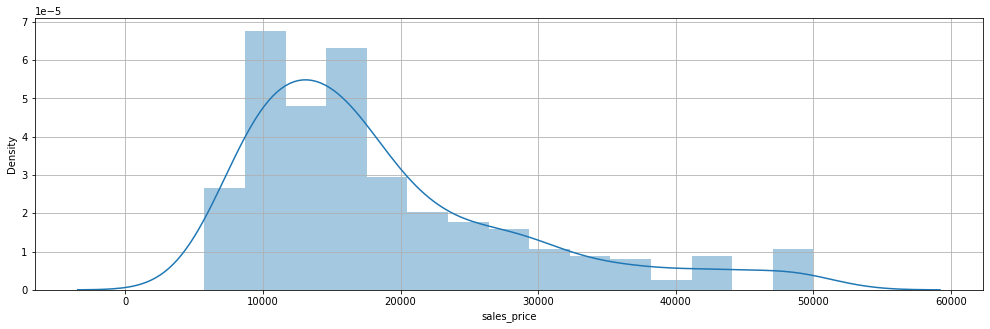

In [168]:
plt.figure(figsize=(17,5))
sns.distplot(df1['sales_price'])
plt.grid()

In [186]:
#Which Brand Gives Highest Battery Capacity

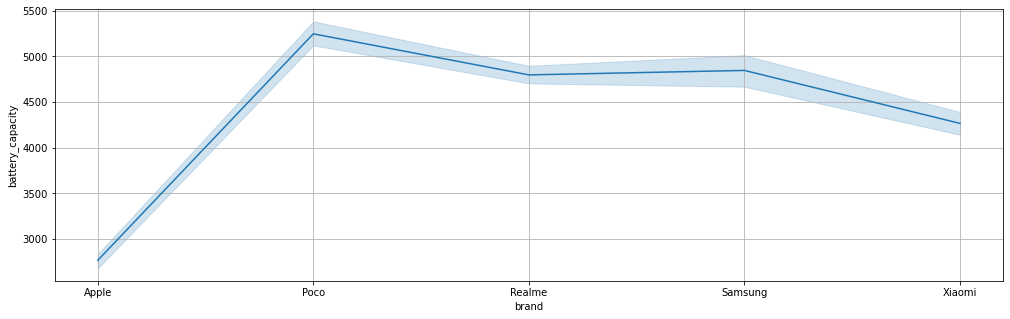

In [185]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['brand'],y=df['battery_capacity'])
plt.grid()
plt.show()

In [194]:
#Let us Make a HeatMap To See Relations between Features

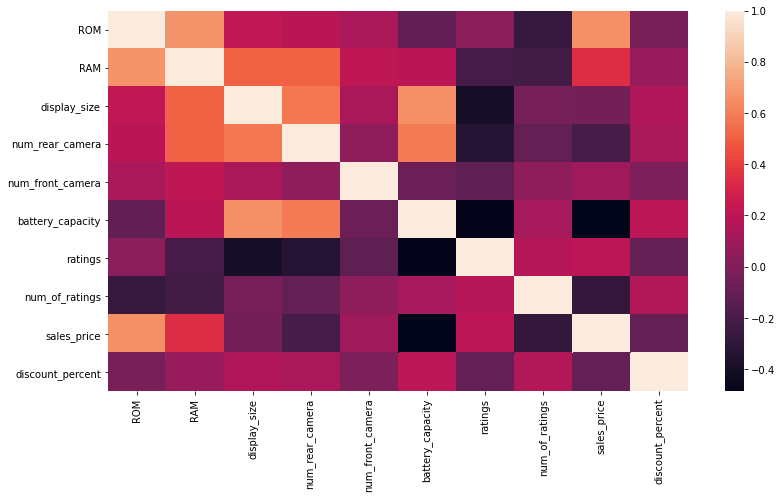

In [193]:
plt.figure(figsize=(13,7))
cor=df.corr()
sns.heatmap(cor)
plt.show()
